# Module 4 - Algo Trading using Classification


   ### Welcome to the Answer notebook for Module 4 ! 
Make sure that you've submitted the module 3 notebook and unlocked Module 4 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 4.1 
Import the csv file of the stock which contained the Bollinger columns as well.



In [1]:
import pandas as pd
import numpy as np

In [2]:
jet = pd.read_csv("../Module 2/modified_jet.csv")

### Query 4.1a 

Create a new column 'Call' , whose entries are - 

>'Buy' if the stock price is below the lower Bollinger band 

>'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 

>'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 

>'Short' if the stock price is above the upper Bollinger band




In [3]:
import matplotlib.pyplot as plt

In [4]:
print(jet.shape[0])
jet.dropna(inplace=True)
print(type(jet))

494
<class 'pandas.core.frame.DataFrame'>


In [5]:
jet.reset_index(drop= True, inplace= True)

In [6]:
jet['Call'] = 0

In [7]:
value = {'Buy': 0 ,
         'Hold Buy' : 1,
         'Short' : 2,
         'Hold Short' : 3}

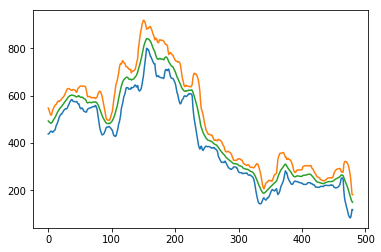

In [8]:
plt.plot(jet.index,jet['lower_band'])
plt.plot(jet.index,jet['upper_band'])
plt.plot(jet.index,jet['avg'])
plt.show()

In [9]:
for ix in range(jet.shape[0]):
    if jet['Close Price'][ix] < jet['lower_band'][ix]:
        jet['Call'][ix] = value['Buy']
    elif jet['Close Price'][ix] > jet['lower_band'][ix] and jet['Close Price'][ix] < jet['avg'][ix]:
        jet['Call'][ix] = value['Hold Buy']
    elif jet['Close Price'][ix] > jet['avg'][ix] and jet['Close Price'][ix] < jet['upper_band'][ix]:
        jet['Call'][ix] = value['Hold Short']
    else:
        jet['Call'][ix] = value['Short']

/home/abhishek/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/abhishek/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/abhishek/.local/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/abhishek/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWit

In [136]:
# Model Parameters

X = jet[['lower_band','upper_band','avg','Close Price']]
y = jet['Call']

In [114]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [137]:
#Splitting in training and testing data
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2,)

## Linear Regeression

In [138]:
lr = LinearRegression()

In [142]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [143]:
lr.score(X_test,Y_test)

0.5281083917955702

## Logistics Regression

In [144]:
logicr = LogisticRegression()

In [145]:
logicr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [146]:
logicr.score(X_test,Y_test)

0.9484536082474226

## Random Forest

In [147]:
rf = RandomForestClassifier(criterion = 'entropy',n_estimators=31,max_depth=10)

In [148]:
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=31, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [149]:
rf.score(X_test,Y_test)

0.8144329896907216

## SVM

In [150]:
sv = SVC()

In [151]:
sv.fit(X_test,Y_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [152]:
sv.score(X_test,Y_test)

1.0

# Knn

In [153]:
from sklearn.neighbors import KNeighborsClassifier

In [154]:
knn = KNeighborsClassifier()

In [155]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [156]:
knn.score(X_test,Y_test)

0.8350515463917526

Here SVM performed better in all the classifier

### Importing new dataset

In [130]:
bajaj = pd.read_csv('../DataSet/Small_Cap/BAJAJELEC.csv')

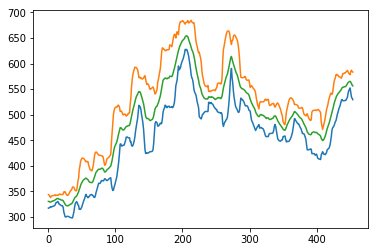

In [158]:
bajaj_avg = bajaj['Close Price'].rolling(window = 14).mean()
bajaj_sd = bajaj['Close Price'].rolling(window = 14).std()

for ix in bajaj_avg:
    upper_band = bajaj_avg + 2 * bajaj_sd
    lower_band = bajaj_avg - 2 * bajaj_sd

bajaj['upper_band'] = upper_band
bajaj['lower_band'] = lower_band
bajaj['avg'] = bajaj_avg
bajaj['bajaj_sd'] = bajaj_sd

bajaj.dropna(inplace=True)

bajaj.reset_index(drop= True, inplace= True)
bajaj['Call'] = 0

        
plt.plot(bajaj.index,bajaj['lower_band'])
plt.plot(bajaj.index,bajaj['upper_band'])
plt.plot(bajaj.index,bajaj['avg'])
plt.show()
        
X_bajaj_test = bajaj[['lower_band','upper_band','avg','Close Price']]

In [169]:
print(knn.predict(X_bajaj_test))
#print(sv.predict(X_bajaj_test))
#print(rf.predict(X_bajaj_test))
#print(lr.predict(X_bajaj_test))
#print(logicr.predict(X_bajaj_test))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 1 1 1 1 1 1 1
 3 3 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 0 1 1 1 1 3 3 3 3
 3 3 3 3 3 3 1 1 1 3 1 1 1 1 1 3 1 1 1 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 1 1 1 1 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 0 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 1 3 3 3 1 1 1 1 3 3 1 1 1 3 3 3 3 3 3 1 1 1 1 1 3 1 3 3 3 3 3
 3 3 3 3 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 1 1 3 3 3 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 3 3 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 1 1 1 1 1 0 0 0]


# Query 4.2

4.2 Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.

Import the stock data file of your choice

Define 4 new columns , whose values are: 
% change between Open and Close price for the day 
% change between Low and High price for the day 
5 day rolling mean of the day to day % change in Close Price 
5 day rolling std of the day to day % change in Close Price

Create a new column 'Action' whose values are: 
1 if next day's price(Close) is greater than present day's. 
(-1) if next day's price(Close) is less than present day's. 
i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ] 
i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]

Construct a classification model with the 4 new inputs and 'Action' as target

Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

In [174]:
bajaj['Open-Close'] = bajaj['Open Price'] - bajaj['Close Price']
bajaj['Low-High'] = bajaj['Low Price'] - bajaj['High Price']
bajaj['Per-Change'] = bajaj['Close Price'].pct_change()

In [175]:
bajaj_mean = bajaj['Per-Change'].rolling(window = 5).mean()
bajaj_std = bajaj['Per-Change'].rolling(window = 5).std()

In [205]:
bajaj['bajaj_mean'] = bajaj_mean
bajaj['bajaj_std']  = bajaj_std

In [231]:
bajaj.dropna(inplace=True)
bajaj.reset_index(drop= True, inplace= True)

In [232]:
for ix in range(1,bajaj.shape[0]):
    if bajaj['Close Price'][ix] > bajaj['Close Price'][ix-1]:
        bajaj['Action'][ix] = 1
    elif bajaj['Close Price'][ix] < bajaj['Close Price'][ix-1]:
        bajaj['Action'][ix] = -1

/home/abhishek/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/abhishek/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [233]:
np.unique(bajaj['Action'])

array([-1,  1])

In [234]:
new_x = bajaj[['Open-Close','Low-High','bajaj_std','bajaj_mean']]
new_y = bajaj['Action']

In [235]:
new_x_train,new_x_test,new_y_train,new_y_test = train_test_split(new_x,new_y,test_size = 0.2)

In [236]:
rf2 = RandomForestClassifier(criterion = 'entropy',n_estimators=31,max_depth=10)

In [237]:
rf2.fit(new_x_train,new_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=31, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [238]:
rf2.score(new_x_test,new_y_test)

0.8444444444444444

In [279]:
cuml = bajaj['Close Price']/ bajaj['Open Price'][0]
cuml = (cuml -1)

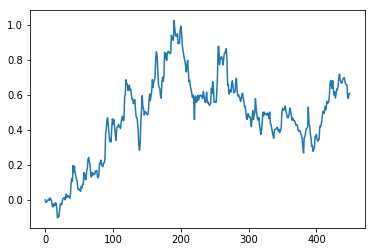

In [284]:
plt.plot(bajaj.index,cuml)
plt.show()